### Your name:

<pre> Ehsanul Haque</pre>

### Collaborators:

<pre> None</pre>


In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


### Dimesionality Reduction

Q. What is the curse of dimensionality?

Curse of dimensionality: 

We represent data with features or dimensions. As the dimension increases, more data is needed to generalize accurately. Amount of data grows exponentially with the increment of dimensions. This exponential growth of data causes high sparcity in data set. Also, it needs more memory to hold these data and requires more processing power and time to perform lengthy calculations. Values added by the additional dimensions are minor while the overhead created are high. Many machine learning algorithms do not perform well with higher dimensions.   

Q. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

PCA works best in data sets where corelations are linear. If data set is highly non linear, PCA will have more dimensions with non zero values. If PCA discards some of these dimensions, data might lose valuable information.

Q. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

Dimensionality algorithms aims at reducing dimensions while keeping most of the information. One way to evaluate performance is by reverse transformation and calculating reconstruction error.

Another way is to use dimensionality reduction algorithm in the data pre processing stage. After pre processing, a second machine learning algorithm is applied. Accuracy and train/predict time can be calculated and compared for the following two cases:

1. Dimensionality reduction algorithm + another ML algorithm
2. ML algorithm without Dimensionality reduction algorithm 

Q. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [2]:
# Your code here
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)              # fetch_openml() returns targets as strings
#sort_by_target(mnist)                                    # fetch_openml() returns an unsorted dataset


In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)

In [6]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

total = t1-t0
print(total)

C:\Users\Ehsanul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


6.200165033340454


Random Forest classifier took 9.5447 sec to train.

In [7]:
t0 = time.time() 
y_pred = rnd_clf.predict(X_test)
t1 = time.time()

total = t1-t0
print(total)


0.3212251663208008


Random Forest classifier took 0.32723 sec to predict.

In [8]:
from sklearn.metrics import accuracy_score

print(rnd_clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9492


RandomForestClassifier has accuracy score 0.9492

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

In [10]:
t0 = time.time()
rnd_clf.fit(X_reduced, y_train)
t1 = time.time()

total = t1-t0
print(total)

16.729382514953613


PCA took 28.0920 sec to fit.

In [11]:
X_reduced.shape

(60000, 154)

In [12]:
pca = PCA(n_components = 154)
X_reduced_test = pca.fit_transform(X_test)

In [13]:
t0 = time.time() 
y_pred_test = rnd_clf.predict(X_reduced_test)
t1 = time.time()

total = t1-t0
print(total)




0.05804109573364258


PCA took 0.16812 sec to predict

Q. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [14]:
# Data fetch from minst

from sklearn.datasets import fetch_openml
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)                   # fetch_openml() returns targets as strings

In [15]:
# 10000 training data from minst to fit into TSNE 

X, y = mnist["data"], mnist["target"]
X_train, y_train = X[:10000], y[:10000]

In [16]:
# 10000 data are used to fit in TSNE

import numpy as np
np.random.seed(42)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, verbose = 2)
TSNE_X = tsne.fit_transform(X_train)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.524s...
[t-SNE] Computed neighbors for 10000 samples in 172.685s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 433.992151
[t-SNE] Computed conditional probabilities in 2.140s
[t-SNE] Iteration 50: error = 97.7073822, gradient norm = 0.0006258 (50 iterations in 11.404s)
[t-SN

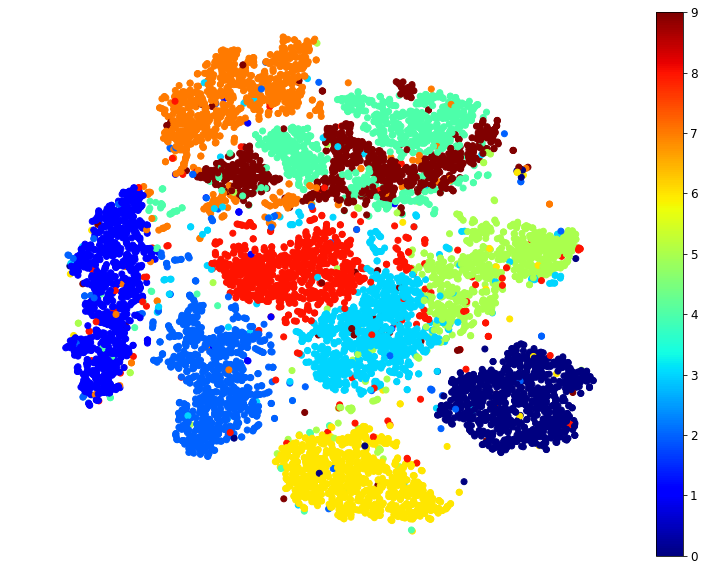

In [17]:
# TSNE plot is for 10000 data and tagets. All targets are in different colors

import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(TSNE_X[:, 0], TSNE_X[:, 1], c=y_train, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

TSNE plot is for 10000 data

In [18]:
# 10000 data for PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X_train)

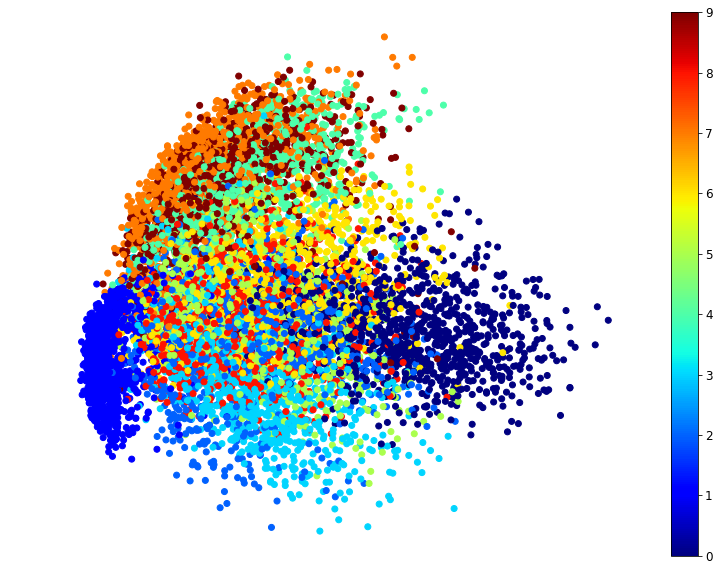

In [19]:
# PCA plot is for 10000 data and tagets. All targets are in different colors

import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

PCA plot for 10000 data

In [20]:
# 10000 data for LLE

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2,random_state = 42)
X_reduced_lle = lle.fit_transform(X_train)

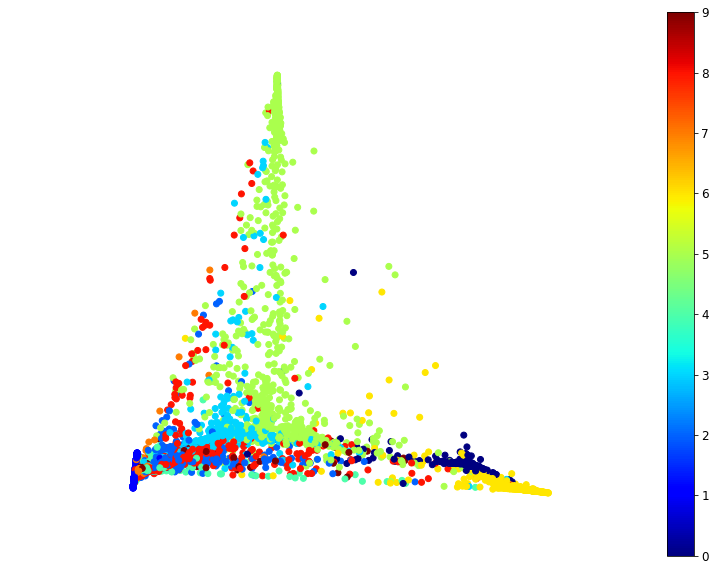

In [21]:
# Plot for LLE and targts

plt.figure(figsize=(13,10))
plt.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1], c=y_train, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Plot for LLE

In [22]:
# 2000 data for MDS

from sklearn.manifold import MDS

X_train_mds, y_train_mds = X[:2000], y[:2000]
mds = MDS(n_components = 2,random_state = 42)
X_reduced_mds = mds.fit_transform(X_train_mds)


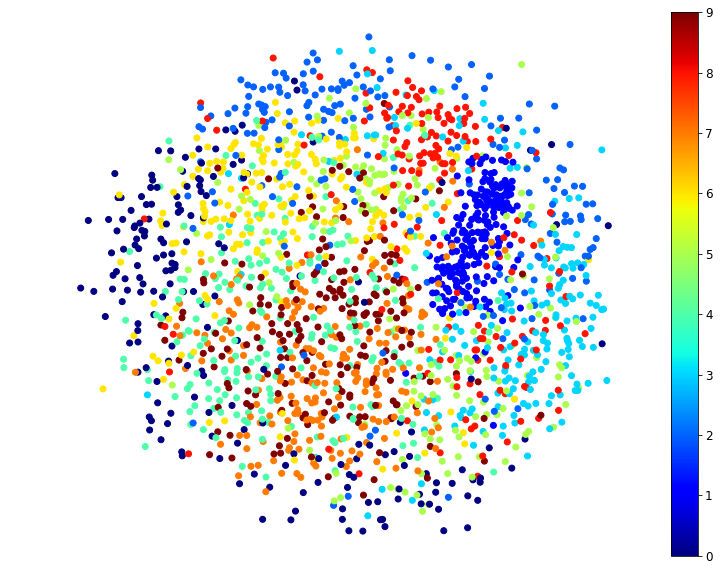

In [23]:
# Plot for MDS and targets

plt.figure(figsize=(13,10))
plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=y_train_mds, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Plot for MDS

In [24]:
# 10000 data for Randomized PCA

from sklearn.decomposition import PCA

rnd_pca = PCA(n_components = 2, svd_solver = "randomized")
X_reduced = rnd_pca.fit_transform(X_train)

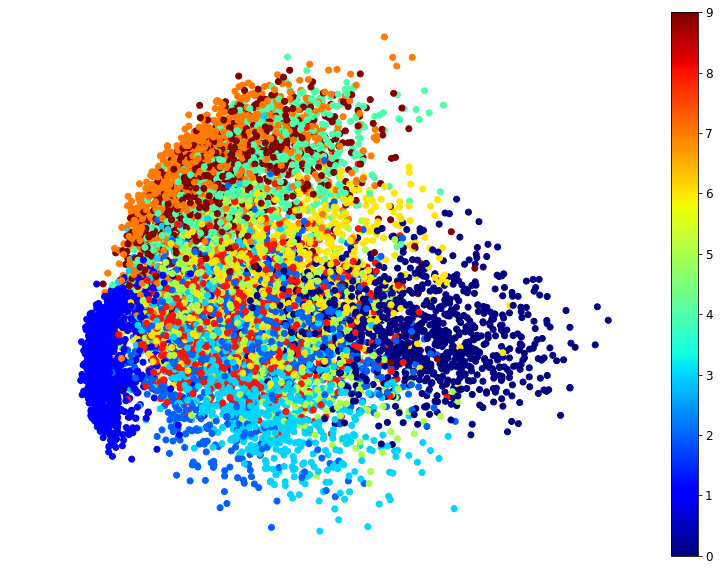

In [25]:
# Randomized PCA plot for 10000 data and tagets.

import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Randomized PCA plot for 10000 data

In [26]:
# 10000 data for Kernel PCA

from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = .04)
X_reduced = rbf_pca.fit_transform(X_train)

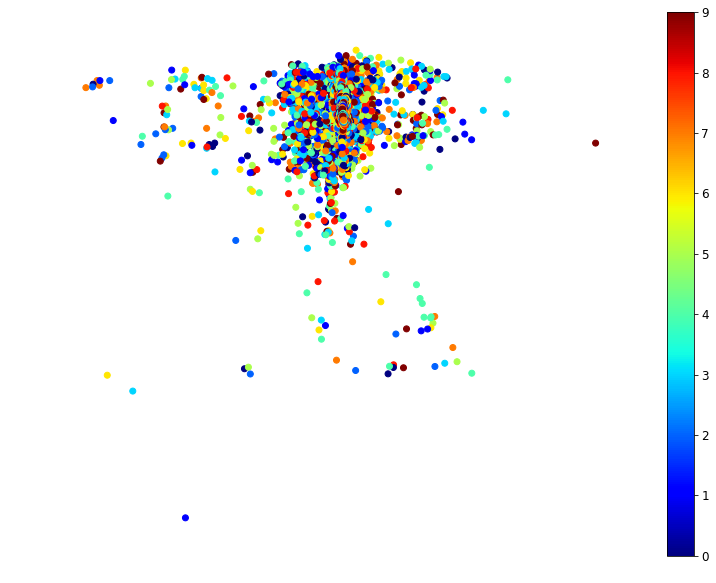

In [27]:
# Kernel PCA plot for 10000 data and tagets.

import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Kernel PCA plot for 10000 data

After reviewing all the plots, it appears that TSNE has the best visualization with well-separated clusters of digits.

### Submit your notebook

Submit your solution here

Make sure you rename your notebook to    
W3_UTORid.ipynb    
Example W3_adfasd01.ipynb
